<img src="images/house.jpg" width=400 height=400 />

#  Overview

This project analyzes the aspects of houses in order to reccommend renovations for a real estate office. Descriptive analysis of various aspects of house, such as how many sqft it is, how many floors, and how many bathrooms were used in a linear regression inferential anaylsis to find the highest correlation between the features. Our recommendation for the real estate office in renovating properties is to possibly expand the sqft of homes, including adding more bathrooms and bedrooms. 

# Business Problem

<img src="images/floorplan.jpg" width=400 height=400 />

The local real estate company wants to know what renovations improve the house prices in their King County. Inferential statistics of the data provided are depicted in order to aid the the real estate office in understanding the market value in local house renovations in comparison to others in order to recommend profitable renovations to their clients. 

# Data Understanding 

<img src="images/interiordesign.jpg" width=400 height=400 />

The data provided is csv file of many different aspects of homes in the area such as how many floors, bathrooms, bedrooms they contain. And also when they were built, renovated, and other aspects such as having a waterfront or a view. 

In [763]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import seaborn as sns 
import operator
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats

In [764]:
#load data
data = pd.read_csv('Data')
train = pd.read_csv("Data")
test = pd.read_csv("Data")

In [766]:
#inspect data
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [618]:
# Column names
data.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [619]:
# Information about the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Find most correlated feature with Price 

In [767]:
#Create train and test groups to find most correlated feature
train = train.drop(['date', 'long', 'zipcode', 'yr_built', 'lat', "sqft_lot15"],axis =1)
test = test.drop (['date', 'long', 'zipcode', 'yr_built', 'lat',"sqft_lot15"], axis =1)

X_train = train.drop(["price"], axis =1)
y_train = train["price"]

X_test = test.drop(["price"], axis=1)
y_test = test["price"]


X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15
0,7129300520,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,0.0,1340
1,6414100192,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1991.0,1690
2,5631500400,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,NaN,2720
3,2487200875,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,0.0,1360
4,1954400510,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,0.0,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,0.0,1530
21593,6600060120,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,0.0,1830
21594,1523300141,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,0.0,1020
21595,291310100,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,0.0,1410


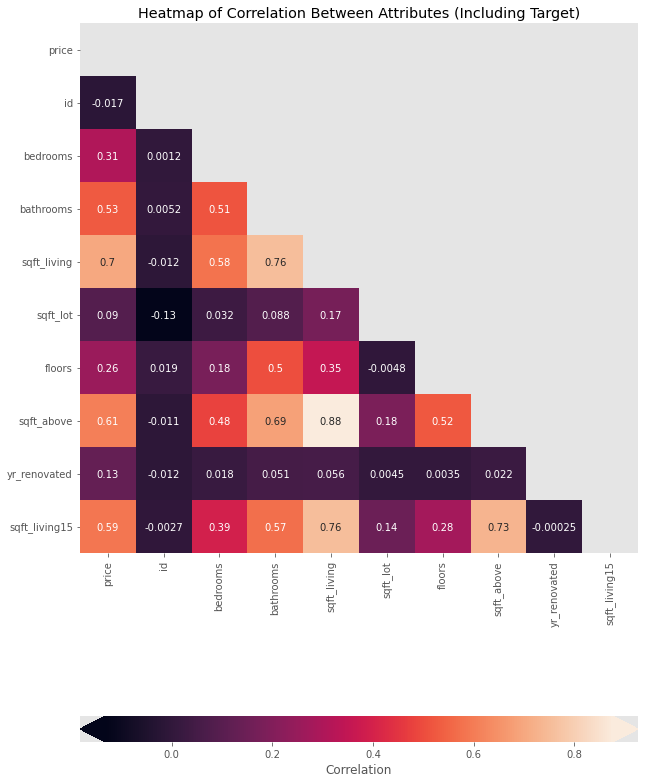

In [768]:
#visualization of correlation within the data set with price as the dependent variable

heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(10, 15))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [769]:
#sqft_living and price have a correlation of 70% so it is the most correlated feature
most_correlated_feature = "sqft_living"

In [770]:
X_train[most_correlated_feature]

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21592    1530
21593    2310
21594    1020
21595    1600
21596    1020
Name: sqft_living, Length: 21597, dtype: int64

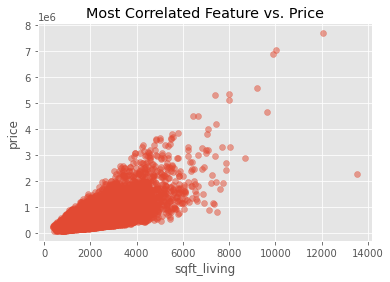

In [772]:
#there is a trend towards linearity and therefore is worth looking into this feature 
fig, ax = plt.subplots()

ax.scatter(X_train[most_correlated_feature], y_train, alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("price")
ax.set_title("Most Correlated Feature vs. Price");

## Looking into description aspects for all features in the data set

In [622]:
data.groupby('bedrooms')['bedrooms'].count()

bedrooms
1      196
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

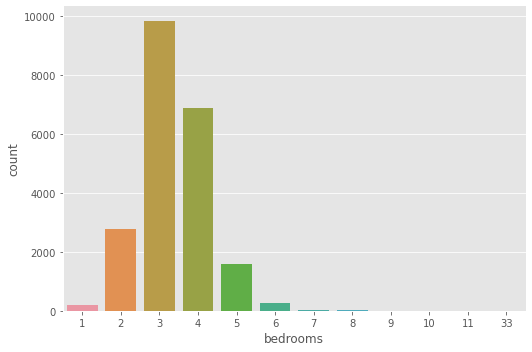

In [773]:
#Most houses in the area that the data set covers have 3 bedrooms
fg = sns.factorplot('bedrooms', data=data, kind='count', aspect=1.5)
fg.set_xlabels('bedrooms')

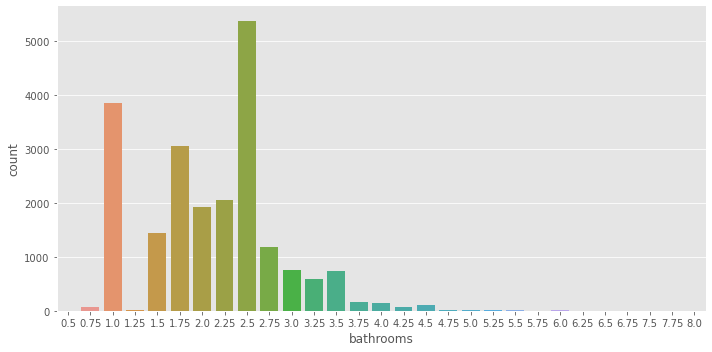

In [775]:
#Most houses in the area that the data set coversve 2.5 bathrooms
data.groupby('bathrooms')['bathrooms'].count()
fg = sns.factorplot('bathrooms', data=data, kind='count', aspect=2)
fg.set_xlabels('bathrooms')

In [776]:
#Most houses in the area that the data set covers do not have a view
data.groupby('waterfront')['waterfront'].count()


waterfront
NO     19075
YES      146
Name: waterfront, dtype: int64

In [777]:
#Organizing the conditions in order of worst to best 
org_cond= ['Poor', 'Fair', 'Average','Good', 'Good condition', 'Very Good']

In [778]:
cond_sort = sorted(data['condition'], key=lambda x: org_cond.index(x))

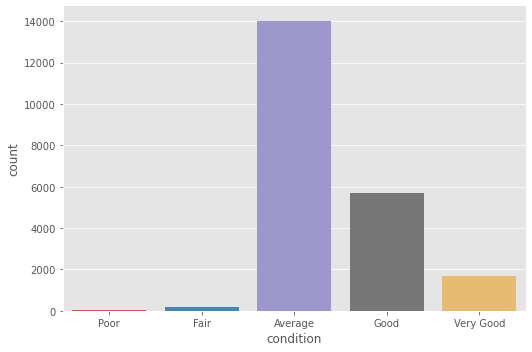

In [780]:
#Most houses in this area covered by the data set are described as in average condition. 
data.groupby('condition')['condition'].count()
fg = sns.factorplot(cond_sort, data=data, kind='count', aspect=1.5)
fg.set_xlabels('condition')

In [781]:
#Organizing the grades of the houses from worst to best
org_grade= ['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion']

In [782]:
grade_sort = sorted(data['grade'], key=lambda x: org_grade.index(x))

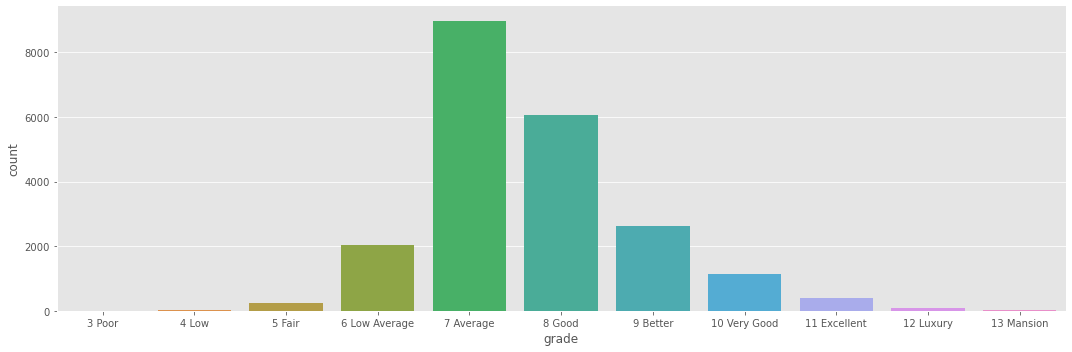

In [783]:
data.groupby('grade')['grade'].count()
fg = sns.factorplot(grade_sort, data=data, kind='count', aspect=3)
fg.set_xlabels('grade')

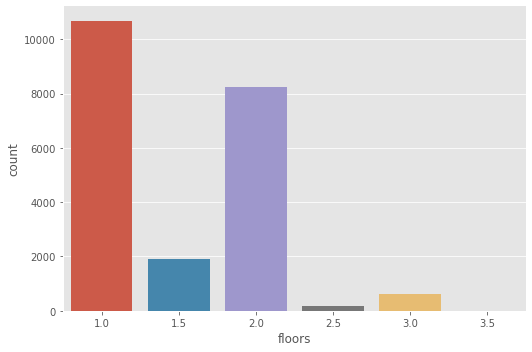

In [784]:
#Most houses in the area have either 1 or 2 floors and very few have 2.5 or 3
data.groupby('floors')['floors'].count()
fg = sns.factorplot('floors', data=data, kind='count', aspect=1.5)
fg.set_xlabels('floors')

# Data Preparation

To prepare the data for analysis I looked for any outliers or nan/null variables by first looking at visualizations. 

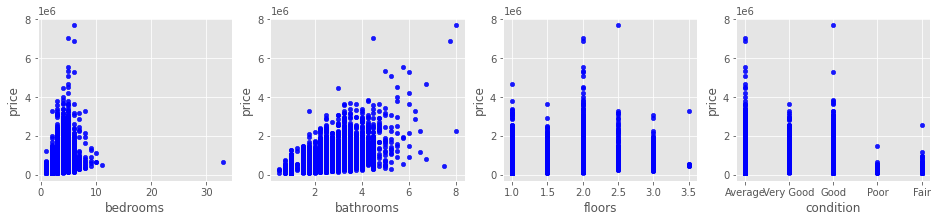

In [785]:
#there are outliers in bedrooms and bathrooms especially
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'floors', 'condition'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.9, color='b')

Now I will identify and remove the outliers by first showing a boxplot and then using interquartile percentages to determine exact outliers and use those to drop those data points of bedrooms, bathrooms, sqft_living, waterfront, and view in this order. Along with dropping the outliers, I identifed any NAN or items of no value to also to remove from the data set in preparation of model building. 

In [640]:
print(data['bedrooms'].describe())

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64


In [288]:
print(data['bedrooms'].nunique())

12


<AxesSubplot:xlabel='bedrooms'>

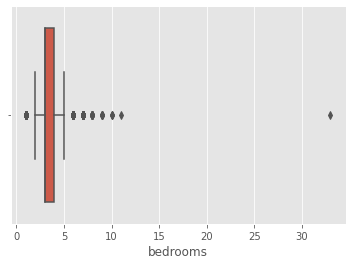

In [641]:
sns.boxplot(data['bedrooms'])

In [642]:
upper_limit = data['bedrooms'].quantile(0.99)
lower_limit = data['bedrooms'].quantile(0.01)

In [643]:
new_data = data[(data['bedrooms'] <= 5) & (data['bedrooms'] >= .5)]

<AxesSubplot:xlabel='bedrooms'>

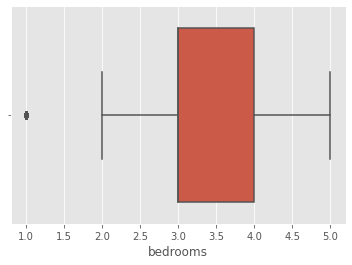

In [644]:
sns.boxplot(new_data['bedrooms'])

In [645]:
data['bedrooms'] = (new_data['bedrooms'])

In [646]:
bedrooms_sample = data[data["bedrooms"].isna()]
bedrooms_sample

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
209,6300000550,7/17/2014,464000.0,NaN,3.00,2300,3404,2.0,NO,NONE,...,7 Average,1600,700.0,1920,1994.0,98133,47.7067,-122.343,1560,1312
232,9264902050,11/21/2014,315000.0,NaN,2.75,2940,7350,1.0,NO,NONE,...,8 Good,1780,1160.0,1978,0.0,98023,47.3103,-122.339,2120,8236
239,5152100060,5/29/2014,472000.0,NaN,2.50,4410,14034,1.0,NO,AVERAGE,...,9 Better,2350,2060.0,1965,0.0,98003,47.3376,-122.324,2600,13988
331,2946001550,4/16/2015,279000.0,NaN,1.75,2240,11180,2.0,NO,NONE,...,7 Average,2240,0.0,1955,0.0,98198,47.4200,-122.323,1590,7955
486,9286000240,7/11/2014,1070000.0,NaN,3.50,4860,11793,2.0,NO,NONE,...,11 Excellent,3860,1000.0,1998,0.0,98006,47.5521,-122.137,3600,11793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20968,2149800278,10/15/2014,343000.0,NaN,5.00,2732,7655,2.0,NO,NONE,...,7 Average,2732,0.0,2009,0.0,98002,47.3045,-122.211,3078,69993
21069,4449800480,3/18/2015,677790.0,NaN,3.00,2800,4213,2.0,NaN,NONE,...,8 Good,2800,0.0,1998,0.0,98117,47.6892,-122.389,1440,3960
21170,7896300592,1/14/2015,303500.0,NaN,4.50,3390,7200,2.0,NO,NONE,...,8 Good,2440,950.0,2007,0.0,98118,47.5205,-122.288,2040,7214
21359,6061500100,7/17/2014,1170000.0,NaN,3.50,4310,7760,2.0,NO,NONE,...,10 Very Good,3260,1050.0,2013,0.0,98059,47.5297,-122.155,4620,10217


In [647]:
print(data['bathrooms'].describe())

count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64


In [648]:
print(data['bathrooms'].nunique())

29


<AxesSubplot:xlabel='bathrooms'>

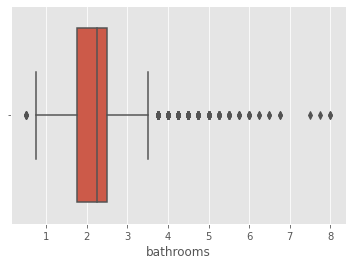

In [649]:
sns.boxplot(data['bathrooms'])

In [650]:
upper_limit = data['bathrooms'].quantile(0.99)
lower_limit = data['bathrooms'].quantile(0.01)

In [651]:
new_data = data[(data['bedrooms'] <= 3.5) & (data['bedrooms'] > 1.5)]

<AxesSubplot:xlabel='bathrooms'>

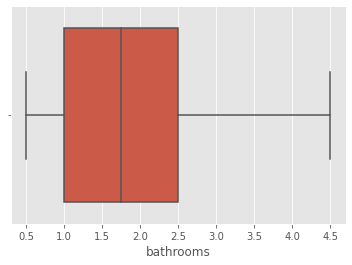

In [652]:
sns.boxplot(new_data['bathrooms'])

In [653]:
data['bathrooms'] = (new_data['bathrooms'])

In [654]:
bathrooms_sample = data[data["bathrooms"].isna()]
bathrooms_sample

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3,2487200875,12/9/2014,604000.0,4.0,NaN,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
5,7237550310,5/12/2014,1230000.0,4.0,NaN,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
14,1175000570,3/12/2015,530000.0,5.0,NaN,1810,4850,1.5,NO,NONE,...,7 Average,1810,0.0,1900,0.0,98107,47.6700,-122.394,1360,4850
15,9297300055,1/24/2015,650000.0,4.0,NaN,2950,5000,2.0,NO,GOOD,...,9 Better,1980,970.0,1979,0.0,98126,47.5714,-122.375,2140,4000
17,6865200140,5/29/2014,485000.0,4.0,NaN,1600,4300,1.5,NO,NONE,...,7 Average,1600,0.0,1916,0.0,98103,47.6648,-122.343,1610,4300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21583,7202300110,9/15/2014,810000.0,4.0,NaN,3990,7838,2.0,NO,NONE,...,9 Better,3990,0.0,2003,NaN,98053,47.6857,-122.046,3370,6814
21584,249000205,10/15/2014,1540000.0,5.0,NaN,4470,8088,2.0,NO,NONE,...,11 Excellent,4470,0.0,2008,0.0,98004,47.6321,-122.200,2780,8964
21589,3448900210,10/14/2014,610685.0,4.0,NaN,2520,6023,2.0,NO,NaN,...,9 Better,2520,0.0,2014,0.0,98056,47.5137,-122.167,2520,6023
21590,7936000429,3/26/2015,1010000.0,4.0,NaN,3510,7200,2.0,NO,NONE,...,9 Better,2600,910.0,2009,0.0,98136,47.5537,-122.398,2050,6200


In [655]:
data.dropna(subset=["bathrooms"], inplace=True)

In [656]:
print(data['sqft_above'].describe())

count    12584.000000
mean      1479.779561
std        571.801908
min        440.000000
25%       1080.000000
50%       1340.000000
75%       1730.000000
max       5480.000000
Name: sqft_above, dtype: float64


In [719]:
print(data['sqft_living'].nunique())

490


<AxesSubplot:xlabel='sqft_living'>

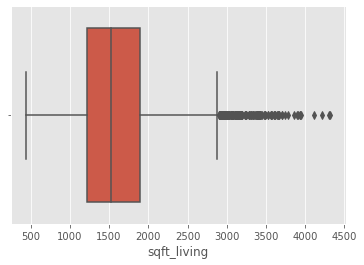

In [720]:
sns.boxplot(data['sqft_living'])

In [721]:
upper_limit = data['sqft_living'].quantile(0.99)
lower_limit = data['sqft_living'].quantile(0.01)

In [725]:
new_data = data[(data['sqft_living'] <= 2700) & (data['sqft_living'] >= 490)]

<AxesSubplot:xlabel='sqft_living'>

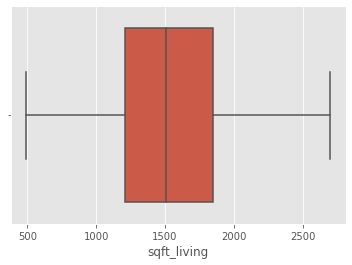

In [726]:
sns.boxplot(new_data['sqft_living'])

In [728]:
data['sqft_living'] = (new_data['sqft_living'])

In [729]:
sqft_above_sample = data[data["sqft_living"].isna()]
sqft_above_sample

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21,2524049179,8/26/2014,2000000.0,3.0,2.75,NaN,44867,1.0,NO,EXCELLENT,...,9 Better,NaN,720.0,1968,0.0,98040,47.5316,-122.233,4110,20336
49,822039084,3/11/2015,1350000.0,3.0,2.50,NaN,65005,1.0,YES,AVERAGE,...,9 Better,NaN,588.0,1953,0.0,98070,47.4041,-122.451,2680,72513
65,3253500160,11/20/2014,317625.0,3.0,2.75,NaN,3809,1.5,NO,NONE,...,7 Average,NaN,1000.0,1925,0.0,98144,47.5747,-122.304,1440,4000
132,1243100136,6/12/2014,784000.0,3.0,3.50,NaN,111078,1.5,NO,NONE,...,9 Better,NaN,1490.0,1989,0.0,98052,47.6970,-122.072,2480,88500
218,1250202145,8/28/2014,1070000.0,2.0,2.25,NaN,14864,1.0,NO,GOOD,...,8 Good,NaN,1950.0,1947,0.0,98144,47.5884,-122.291,2580,5184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20810,9476200710,6/8/2014,530000.0,3.0,2.75,NaN,7200,2.0,NO,AVERAGE,...,9 Better,NaN,930.0,2009,0.0,98056,47.4878,-122.191,1580,8676
21257,7628700050,3/9/2015,775000.0,3.0,2.50,NaN,4120,2.0,NO,NONE,...,9 Better,NaN,660.0,2008,NaN,98126,47.5714,-122.373,2280,4120
21297,8562770050,5/27/2014,627000.0,3.0,3.50,NaN,3475,2.0,NO,NONE,...,8 Good,NaN,1060.0,2005,0.0,98027,47.5359,-122.072,2440,2867
21307,9402800005,10/28/2014,1500000.0,3.0,3.50,NaN,3610,2.0,NO,NONE,...,10 Very Good,NaN,1160.0,2008,NaN,98103,47.6857,-122.339,1780,3610


In [730]:
data.dropna(subset=['sqft_living'], inplace=True)

In [665]:
print(data['waterfront'].describe())

count     10489
unique        2
top          NO
freq      10429
Name: waterfront, dtype: object


In [666]:
waterfront_sample = data[data["waterfront"].isna()]
waterfront_sample

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3.0,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180.0,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
10,1736800520,4/3/2015,662500.0,3.0,2.50,3560,9796,1.0,NaN,NONE,...,8 Good,1860.0,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925
23,8091400200,5/16/2014,252700.0,2.0,1.50,1070,9643,1.0,NaN,NONE,...,7 Average,1070.0,0.0,1985,NaN,98030,47.3533,-122.166,1220,8386
60,1516000055,12/10/2014,650000.0,3.0,2.25,2150,21235,1.0,NaN,GOOD,...,8 Good,1590.0,560.0,1959,0.0,98166,47.4336,-122.339,2570,18900
87,3342103156,6/18/2014,461000.0,3.0,3.25,2770,6278,2.0,NaN,NONE,...,9 Better,1980.0,790.0,2006,0.0,98056,47.5228,-122.199,1900,7349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21562,567000385,6/23/2014,362500.0,2.0,1.50,940,1768,2.0,NaN,NONE,...,7 Average,940.0,0.0,2009,0.0,98144,47.5925,-122.295,1130,1159
21567,2025049203,6/10/2014,399950.0,2.0,1.00,710,1157,2.0,NaN,NONE,...,7 Average,710.0,0.0,1943,0.0,98102,47.6413,-122.329,1370,1173
21586,844000965,6/26/2014,224000.0,3.0,1.75,1500,11968,1.0,NaN,NONE,...,6 Low Average,1500.0,0.0,2014,0.0,98010,47.3095,-122.002,1320,11303
21587,7852140040,8/25/2014,507250.0,3.0,2.50,2270,5536,2.0,NaN,NONE,...,8 Good,2270.0,0.0,2003,0.0,98065,47.5389,-121.881,2270,5731


In [667]:
data.dropna(subset=["waterfront"], inplace=True)

In [668]:
print(data['view'].describe())

count     10457
unique        5
top        NONE
freq       9738
Name: view, dtype: object


In [669]:
view_sample = data[data["view"].isna()]
view_sample

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7,2008000270,1/15/2015,291850.0,3.0,1.50,1060,9711,1.0,NO,NaN,...,7 Average,1060.0,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
487,1895000260,7/21/2014,207950.0,2.0,2.00,890,5000,1.0,NO,NaN,...,6 Low Average,890.0,0.0,1917,0.0,98118,47.5158,-122.264,1860,5000
590,2525069041,9/4/2014,505000.0,3.0,1.50,1830,217800,1.0,NO,NaN,...,7 Average,1010.0,820.0,1981,0.0,98053,47.6277,-121.972,2450,165963
938,1324079046,1/20/2015,350000.0,3.0,2.25,1580,47916,1.0,NO,NaN,...,7 Average,1580.0,0.0,1979,0.0,98024,47.5583,-121.852,1980,75358
1364,9468200140,8/19/2014,450000.0,2.0,1.75,1250,2890,1.0,NO,NaN,...,7 Average,790.0,460.0,1920,0.0,98103,47.6795,-122.353,1500,3225
2415,8924100111,4/24/2015,699000.0,2.0,1.50,1400,4050,1.0,NO,NaN,...,8 Good,1400.0,0.0,1954,0.0,98115,47.6768,-122.269,1900,5940
2833,2710600025,11/3/2014,697000.0,3.0,2.25,2420,5304,1.5,NO,NaN,...,7 Average,1640.0,780.0,1947,0.0,98115,47.6765,-122.285,1560,5304
3237,5259800090,4/27/2015,210000.0,3.0,2.25,1430,9150,1.0,NO,NaN,...,7 Average,1070.0,360.0,1984,0.0,98023,47.3239,-122.350,1430,6364
4740,4123810090,9/9/2014,393000.0,3.0,2.25,2140,10256,2.0,NO,NaN,...,8 Good,2140.0,0.0,1987,NaN,98038,47.3751,-122.044,2040,11717
5207,4031000290,4/8/2015,195000.0,3.0,1.00,1310,9554,1.0,NO,NaN,...,7 Average,960.0,350.0,1962,0.0,98001,47.2949,-122.285,1310,9845


In [670]:
data.dropna(subset=["view"], inplace=True)

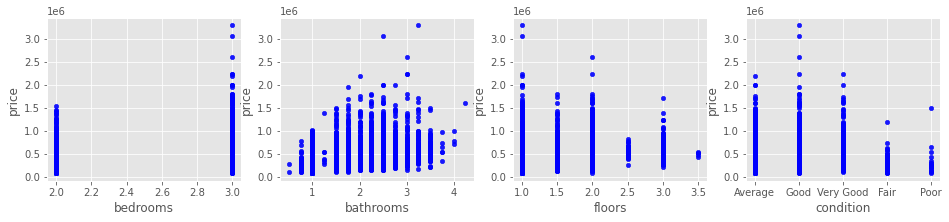

In [671]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'floors', 'condition'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.9, color='b')

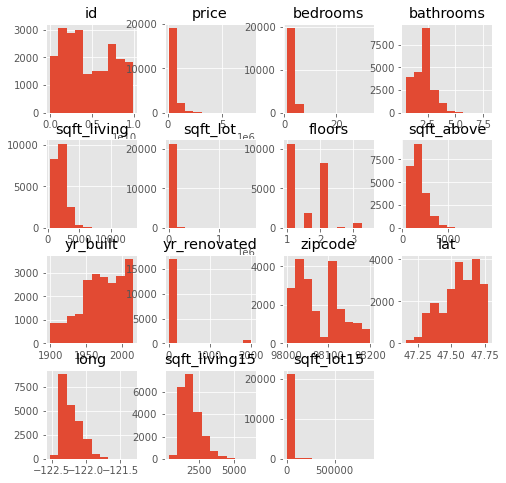

In [786]:
#depicting the variables a final time to ensure that they look as expected after preparation. 
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
data.hist(ax = ax);

# Data Analysis

Modeling a baseline model and two additional models for improvement. Also a model with dummy variables for categorical variables. 

In [678]:
#building a baseline model

In [732]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

In [733]:

from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.4877465936487044
Validation score: 0.5024006604207555


These R-squared scores state that about 50 percent of the variance is explained through the most correlated feature (sqft_living)

In [734]:
X_train_numeric = X_train.select_dtypes("number").copy()

X_train_numeric

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_renovated,sqft_living15
0,7129300520,3,1.00,1180,5650,1.0,1180,0.0,1340
1,6414100192,3,2.25,2570,7242,2.0,2170,1991.0,1690
2,5631500400,2,1.00,770,10000,1.0,770,NaN,2720
3,2487200875,4,3.00,1960,5000,1.0,1050,0.0,1360
4,1954400510,3,2.00,1680,8080,1.0,1680,0.0,1800
...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530,1131,3.0,1530,0.0,1530
21593,6600060120,4,2.50,2310,5813,2.0,2310,0.0,1830
21594,1523300141,2,0.75,1020,1350,2.0,1020,0.0,1020
21595,291310100,3,2.50,1600,2388,2.0,1600,0.0,1410


IndexError: index 2 is out of bounds for axis 0 with size 2

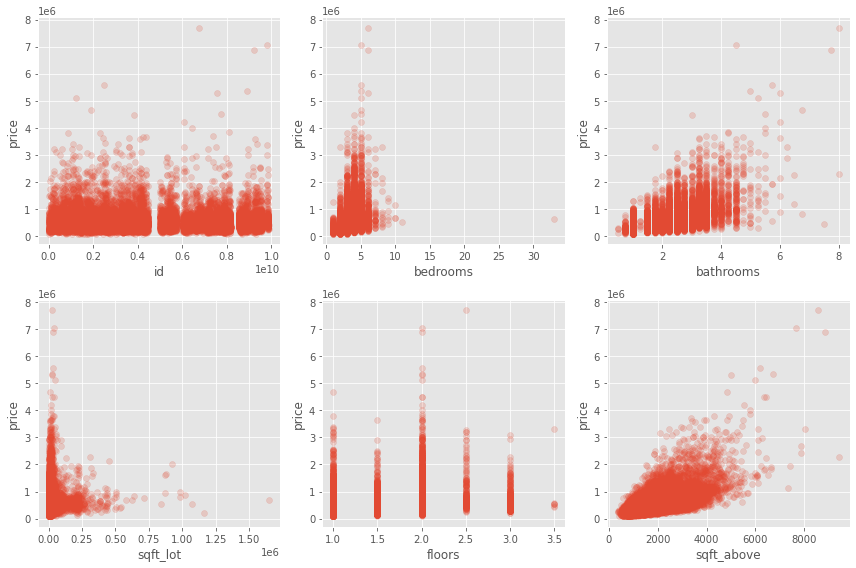

In [735]:

scatterplot_data = X_train_numeric.drop("sqft_living", axis=1)

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 8))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X_train_numeric[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("price")

In [821]:
#Second model. Droping unecessary features to improve model
X_train_second_model = X_train_numeric.drop(["id", "floors", "yr_renovated",], axis=1).copy()

X_train_second_model

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_living15
0,3,1.00,1180,5650,1180,1340
1,3,2.25,2570,7242,2170,1690
2,2,1.00,770,10000,770,2720
3,4,3.00,1960,5000,1050,1360
4,3,2.00,1680,8080,1680,1800
...,...,...,...,...,...,...
21592,3,2.50,1530,1131,1530,1530
21593,4,2.50,2310,5813,2310,1830
21594,2,0.75,1020,1350,1020,1020
21595,3,2.50,1600,2388,1600,1410


In [822]:
#The second model shows a slight improvement in R-squared over the baseline model
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.512700455751263
Validation score: 0.5213193182891275

Baseline Model
Train score:      0.4877465936487044
Validation score: 0.5024006604207555


In [862]:
#summary of the regression results 
import statsmodels.api as sm
import statsmodels.formula.api as smf

regression_results = sm.OLS(y_train, sm.add_constant(X_train_second_model))

results = regression_results.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     3838.
Date:                Mon, 20 Jun 2022   Prob (F-statistic):               0.00
Time:                        07:41:45   Log-Likelihood:            -2.9955e+05
No. Observations:               21597   AIC:                         5.991e+05
Df Residuals:                   21590   BIC:                         5.992e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.529e+04   7767.497      3.256

In [738]:
significant_features = ["sqft_living", "bedrooms"]

In [826]:
#Created third model by singling out two significant features
third_model = LinearRegression()
X_train_third_model = X_train[significant_features]

third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train_third_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.5021647986901715
Validation score: 0.515767645499425

Second Model
Train score:      0.512700455751263
Validation score: 0.5213193182891275

Baseline Model
Train score:      0.4877465936487044
Validation score: 0.5024006604207555


In [827]:
#Using Sklearn to double check understanding of correlated features
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train_second_model)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train_second_model.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
sqft_living: True
sqft_lot: True
sqft_above: True
sqft_living15: True


In [838]:
best_features = ["sqft_living", "bedrooms", "bathrooms"]

In [839]:
X_train_final = X_train[best_features]
X_test_final = X_test[best_features]

In [829]:
#Final model using the three best features from other models and also the sklearn featue selection, 50% of the variance was covered.
final_model = LinearRegression()

# Fit the model on X_train_final and y_train
final_model.fit(X_train_final, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)
final_model.score(X_test_final, y_test)

0.5069507437282965

In [831]:
#the Mean squared error is very high and results in low accuracy of prediction between the actual and predicted data set.
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, final_model.predict(X_test_final), squared=False)

257950.62757199293

In [745]:
print(pd.Series(final_model.coef_, index=X_train_final.columns, name="Coefficients"))
print()
print("Intercept:", final_model.intercept_)

sqft_living      310.184798
bedrooms      -58573.314124
bathrooms       7659.095264
Name: Coefficients, dtype: float64

Intercept: 76386.54771952692


In [1017]:
#Creating dummy variables for each categorical feature and using them in regression
price = data['price']
sqft_living = data['sqft_living']

scaled_price = (price-min(price))/(max(price)-min(price))	

data_fin = pd.DataFrame([])
data_fin['price'] = scaled_price
waterfront_dummies = pd.get_dummies(data['waterfront'], prefix='cyl', drop_first=True)
view_dummies = pd.get_dummies(data['view'], prefix='yr', drop_first=True)

data_fin = pd.concat([price, data_fin, sqft_living, waterfront_dummies,view_dummies], axis=1)

In [1018]:
data_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10379 entries, 1 to 21596
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         10379 non-null  float64
 1   price         10379 non-null  float64
 2   sqft_living   10379 non-null  float64
 3   cyl_YES       10379 non-null  uint8  
 4   yr_EXCELLENT  10379 non-null  uint8  
 5   yr_FAIR       10379 non-null  uint8  
 6   yr_GOOD       10379 non-null  uint8  
 7   yr_NONE       10379 non-null  uint8  
dtypes: float64(3), uint8(5)
memory usage: 375.0 KB


In [1019]:
data_ols = pd.concat([price, sqft_living, waterfront_dummies,view_dummies], axis=1)
data_ols.head()

,price,sqft_living,cyl_YES,yr_EXCELLENT,yr_FAIR,yr_GOOD,yr_NONE
1,538000.0,2570.0,0,0,0,0,1
2,180000.0,770.0,0,0,0,0,1
4,510000.0,1680.0,0,0,0,0,1
6,257500.0,1715.0,0,0,0,0,1
8,229500.0,1780.0,0,0,0,0,1


In [1020]:
formula = 'price ~ sqft_living+waterfront_dummies+view_dummies'
model = ols(formula=formula, data=data_ols).fit()

In [1021]:
outcome = 'price'
predictors = data_ols.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [1023]:
#Unforunately this model with the dummies variables did not have a large R-squared and is therefore not a good model
model_dummies = ols(formula=formula, data=data_ols)

results = model_dummies.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     681.7
Date:                Mon, 20 Jun 2022   Prob (F-statistic):               0.00
Time:                        08:15:54   Log-Likelihood:            -1.3901e+05
No. Observations:               10379   AIC:                         2.780e+05
Df Residuals:                   10372   BIC:                         2.781e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.663e+05   1.08e+04     24.611   

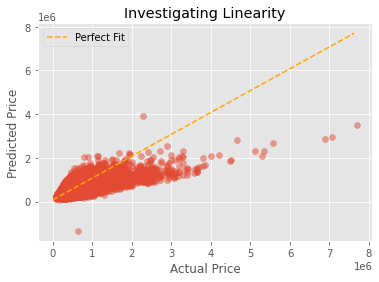

In [820]:
#Investigating Linearity of the predicted price to the actual price
preds = final_model.predict(X_test_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit",)
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.set_title('Investigating Linearity')
ax.legend();

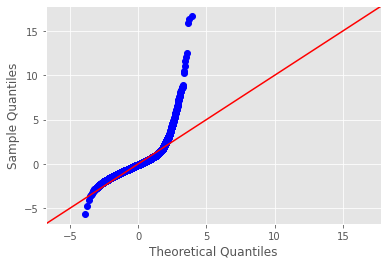

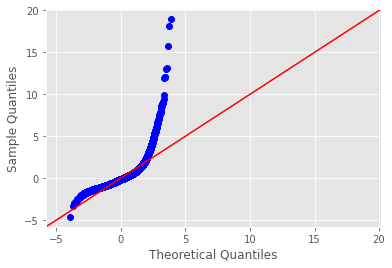

In [830]:
#QQplot of two models, This is skewed in a way that we can state we are violating the normality assumption.

f = 'price~sqft_living'
f2 = 'price~bathrooms'
model = smf.ols(formula=f, data=data).fit()
model2 = smf.ols(formula=f2, data=data).fit()

resid1 = model.resid
resid2 = model2.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45',fit=True)
fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True)

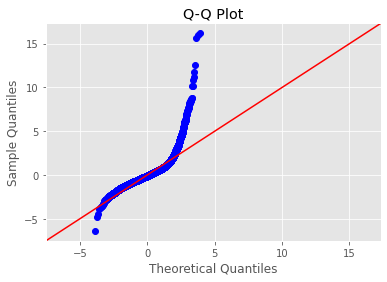

In [817]:
import scipy.stats as stats
residuals = (y_test - preds)

fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45',fit=True, );
plt.title('Q-Q Plot')
plt.show()

Checking Multicollinearity : 

In [715]:
 #We are above 5 for all features and therefore can assume we have high multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
pd.Series(vif, index=X_train_final.columns, name="Variance Inflation Factor")

sqft_living    15.736113
bedrooms       12.057811
bathrooms      18.592046
Name: Variance Inflation Factor, dtype: float64

Checking for high homoscedasticity:

[('Jarque-Bera', 542662.6043957792),
 ('Prob', 0.0),
 ('Skew', 2.819658432483533),
 ('Kurtosis', 26.90063410219431)]

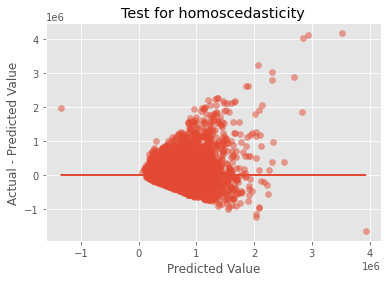

In [810]:
#It is a 'funnel' shape and therefore we can assume that we are violating homoscedasticity, although the p-value is statistically significant of under 0.05.

fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_title('Test for homoscedasticity')
ax.set_ylabel("Actual - Predicted Value");


name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
list(zip(name, test))

## Discussing my final models

I wanted to make sure that I included dummy variables for the two categorical variables, Waterfront and View, that seemed to be correlated with price. I believe that it ended up having such a small R-squared value because not many of the houses had a view or a waterfront. There would be more robust data if there were more houses that had these aspects to them. However, all of the variables were statistically significant with low p-values except for Fair and Good (descriptors of the View variable). This also contributes to my thoughts that more data would lead to a more robut correlation. 

The model with the highest proportion of the variance for a dependent variable that's explained by an independent variable was the second model, with a R-squared of .516, in which building upon the bas model helped in raising the variance explained a little. 

Ultimately, I do not not have much confidence in these models because they explain only fifty percent of the variance at most and also because they do not pass all of the normally distributed data tests, QQ-plots, homoscedasticity, and predicted points against actual points. I can suggest that a sqft_living in a house and the amount of bathrooms and bedrooms are correlated with how much the house is worth but I would need more data to be more confident in my recommendation.